In [1]:
import pandas as pd

# Membaca data AIS
file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"
data_frame = pd.read_csv(file_path)

# Menghitung jumlah baris data
jumlah_baris = data_frame.shape[0]

# Menampilkan jumlah baris
print("Jumlah baris data:", jumlah_baris)

Jumlah baris data: 568670


In [2]:
print("Daftar kolom:")
print(data_frame.columns)

Daftar kolom:
Index(['msg_mmsi', 'msg_kind', 'msg_repeat', 'data_lat', 'data_lon',
       'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'data_utc',
       'dt_last', 'ship_name', 'ship_csign', 'shipkind_id', 'shipflag_id',
       'ship_gt', 'ship_dwt', 'ship_lbp', 'ship_loa', 'ship_draft',
       'ship_depth', 'ship_beam', 'ship_build_int', 'ship_build_str',
       'ship_class', 'shipkind_name', 'flag_name\', 'dt_date time1',
       'dt_date time2', 'dt_date.time1', 'continuous_trip', 'distance',
       'time_diff_seconds', 'empirical_speed', 'hour', 'day', 'month', 'year',
       'Latitude Prediksi', 'Longitude Prediksi', 'MSE Latitude',
       'MSE Longitude'],
      dtype='object')


In [3]:
import pandas as pd

# Membaca data AIS
file_path = "C:/Users/LENOVO/Downloads/hasil_prediksi_1.csv"
data_frame = pd.read_csv(file_path)

# Menghitung jumlah baris data
jumlah_baris = data_frame.shape[0]

# Menampilkan jumlah baris
print("Jumlah baris data:", jumlah_baris)

Jumlah baris data: 567267


In [4]:
jumlah_kapal = data_frame['msg_mmsi'].nunique()
print("Jumlah kapal:", jumlah_kapal)

Jumlah kapal: 1403


In [5]:
print("Daftar kolom:")
print(data_frame.columns)

Daftar kolom:
Index(['msg_mmsi', 'msg_kind', 'msg_repeat', 'data_lat', 'data_lon',
       'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'data_utc',
       'dt_last', 'ship_name', 'ship_csign', 'shipkind_id', 'shipflag_id',
       'ship_gt', 'ship_dwt', 'ship_lbp', 'ship_loa', 'ship_draft',
       'ship_depth', 'ship_beam', 'ship_build_int', 'ship_build_str',
       'ship_class', 'shipkind_name', 'flag_name\', 'dt_date time1',
       'dt_date time2', 'dt_date.time1', 'continuous_trip', 'distance',
       'time_diff_seconds', 'empirical_speed', 'Time', 'Latitude Prediksi',
       'Longitude Prediksi', 'MSE Latitude', 'MSE Longitude'],
      dtype='object')


In [7]:
pip install --upgrade matplotlib


  Using cached matplotlib-3.8.0-cp310-cp310-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
basemap 1.3.7 requires matplotlib<3.8,>=1.5; python_version >= "3.5", but you have matplotlib 3.8.0 which is incompatible.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Path ke file CSV awal
input_file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"

# Baca data dari file CSV awal
data_frame = pd.read_csv(input_file_path)

# Load model dan scaler
model = load_model('model_bigru568670.h5')
scaler = joblib.load('scaler.pkl')

# Ubah kolom 'dt_date.time1' menjadi tipe datetime jika belum
data_frame['dt_date.time1'] = pd.to_datetime(data_frame['dt_date.time1'])

# Tambahkan kolom 'hour', 'day', 'month', dan 'year'
data_frame['hour'] = data_frame['dt_date.time1'].dt.hour
data_frame['day'] = data_frame['dt_date.time1'].dt.day
data_frame['month'] = data_frame['dt_date.time1'].dt.month
data_frame['year'] = data_frame['dt_date.time1'].dt.year

# Memisahkan data antar kapal berdasarkan 'msg_mmsi'
kapal_data = []
for mmsi, group_data in data_frame.groupby('msg_mmsi'):
    kapal_data.append(group_data)

# Loop melalui semua kapal
for kapal in kapal_data:
    # Preprocessing data seperti yang dilakukan sebelumnya
    input_features = ['msg_mmsi', 'data_lat', 'data_lon', 'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'hour', 'day', 'month', 'year']
    X_kapal = kapal[input_features].values

    # Scaling data dengan scaler
    X_kapal_scaled = scaler.transform(X_kapal)

    # Lakukan prediksi dengan model
    y_pred = model.predict(X_kapal_scaled)

    # Menambahkan kolom hasil prediksi ke dalam DataFrame
    kapal['Latitude Prediksi'] = y_pred[:, 0]
    kapal['Longitude Prediksi'] = y_pred[:, 1]

    # Menghitung Mean Squared Error (MSE) antara Latitude dan Longitude
    kapal['MSE Latitude'] = np.square(kapal['Latitude Prediksi'] - kapal['data_lat'])
    kapal['MSE Longitude'] = np.square(kapal['Longitude Prediksi'] - kapal['data_lon'])

# Gabungkan semua data kapal menjadi satu DataFrame
predicted_data_frame = pd.concat(kapal_data)

# Simpan hasil prediksi ke dalam file CSV yang sama tanpa menggantinya
predicted_data_frame.to_csv(input_file_path, index=False)


4/4 [==============================] - 0s 3ms/step


10/10 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step


6/6 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


In [7]:
import pandas as pd

# Membaca data AIS
file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"
data_frame = pd.read_csv(file_path)

# Menghitung jumlah baris data
jumlah_baris = data_frame.shape[0]

# Menampilkan jumlah baris
print("Jumlah baris data:", jumlah_baris)

Jumlah baris data: 568670


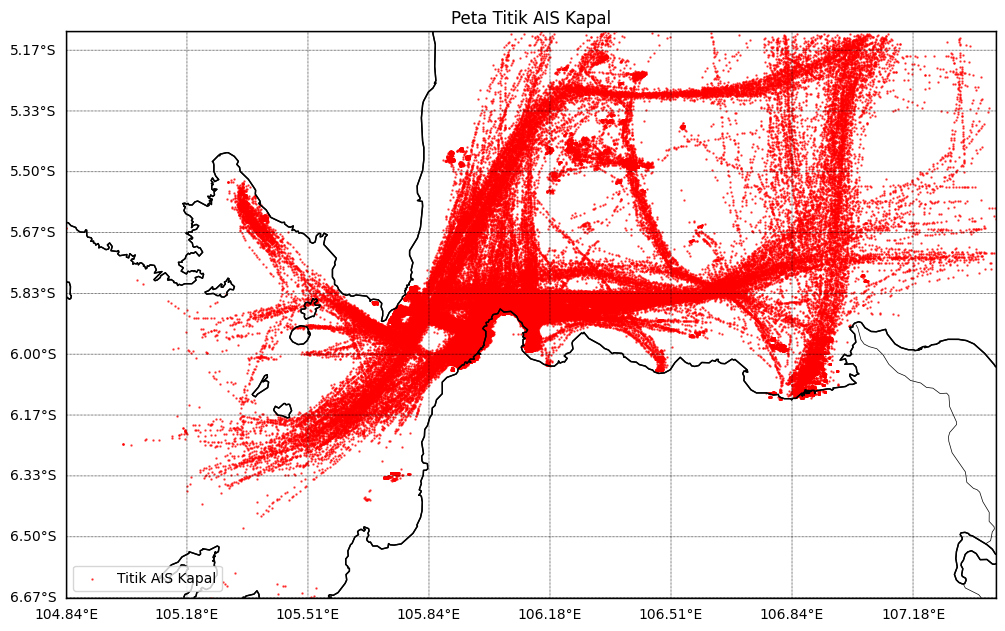

In [9]:
# Mengambil batas minimum dan maksimum latitude dan longitude dari data AIS
lat_min = data_frame['Latitude Prediksi'].min()
lat_max = data_frame['Latitude Prediksi'].max()
lon_min = data_frame['Longitude Prediksi'].min()
lon_max = data_frame['Longitude Prediksi'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Mengambil koordinat garis tepi pantai dari peta yang ditampilkan
coastline_latlon = m.drawcoastlines().get_segments()

# Plot titik-titik awal kapal pada peta
m.scatter(
    data_frame['Longitude Prediksi'], 
    data_frame['Latitude Prediksi'], 
    latlon=True, 
    s=0.5, 
    c='red', 
    marker='o', 
    alpha=0.7, 
    label='Titik AIS Kapal'
)

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()

# Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
parallels = np.arange(lat_min, lat_max, 1/6)
# Menambahkan grid dengan interval 1/3° pada garis vertikal
meridians = np.arange(lon_min, lon_max, 1/3)

m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, linewidth=0.5, fmt='%1.2f')
m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, linewidth=0.5, fmt='%1.2f')

# Menambahkan legenda
plt.legend(loc='best')

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "bigru.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan peta
plt.title('Peta Titik AIS Kapal')
plt.show()

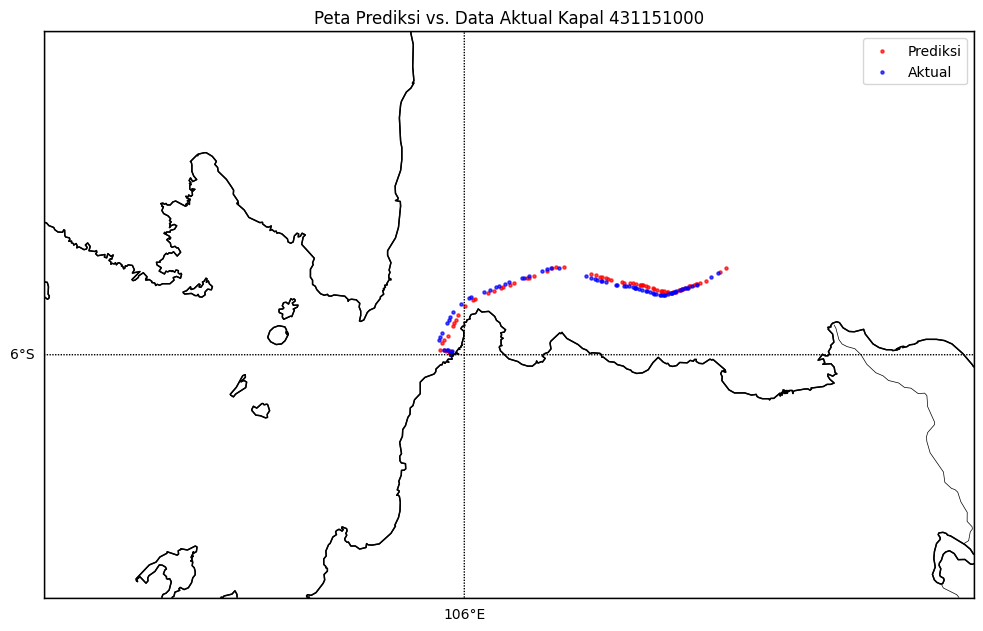

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random

# Path ke file CSV awal
input_file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"

# Baca data dari file CSV awal
data_frame = pd.read_csv(input_file_path)

# Pilih satu MMSI secara acak
unique_mmsi = data_frame['msg_mmsi'].unique()
selected_mmsi = random.choice(unique_mmsi)

# Filter data hanya untuk MMSI yang dipilih
selected_ship_data = data_frame[data_frame['msg_mmsi'] == selected_mmsi]

# Mengambil batas minimum dan maksimum latitude dan longitude dari seluruh data kapal
lat_min = data_frame['Latitude Prediksi'].min()
lat_max = data_frame['Latitude Prediksi'].max()
lon_min = data_frame['Longitude Prediksi'].min()
lon_max = data_frame['Longitude Prediksi'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Mengambil koordinat garis tepi pantai dari peta yang ditampilkan
coastline_latlon = m.drawcoastlines().get_segments()

# Plot titik-titik awal kapal pada peta
m.scatter(
    selected_ship_data['Longitude Prediksi'], 
    selected_ship_data['Latitude Prediksi'], 
    latlon=True, 
    s=5, 
    c='red', 
    marker='o', 
    alpha=0.7, 
    label='Prediksi'
)
m.scatter(
    selected_ship_data['data_lon'], 
    selected_ship_data['data_lat'], 
    latlon=True, 
    s=5, 
    c='blue', 
    marker='o', 
    alpha=0.7, 
    label='Aktual'
)

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()
m.drawparallels(range(int(lat_min), int(lat_max) + 2, 2), labels=[1, 0, 0, 0])
m.drawmeridians(range(int(lon_min), int(lon_max) + 2, 2), labels=[0, 0, 0, 1])

# Menambahkan legenda
plt.legend(loc='best')

# Menampilkan peta
plt.title(f'Peta Prediksi vs. Data Aktual Kapal {selected_mmsi}')
plt.show()


<Figure size 1200x800 with 0 Axes>

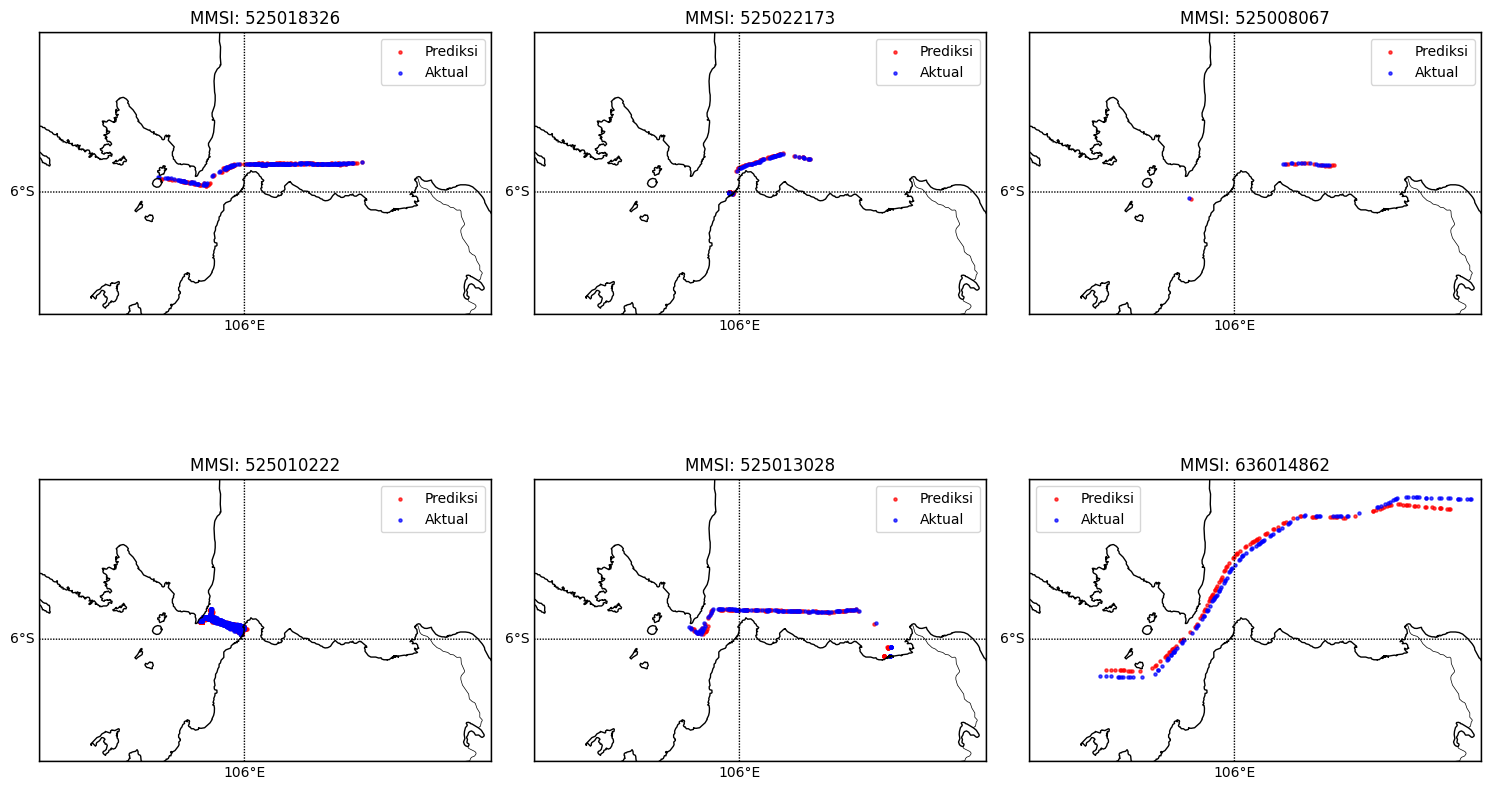

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random

# Pilih 6 MMSI secara acak
unique_mmsi = data_frame['msg_mmsi'].unique()
selected_mmsi = random.sample(list(unique_mmsi), 6)

# Mengambil batas minimum dan maksimum latitude dan longitude dari seluruh data kapal
lat_min = data_frame['Latitude Prediksi'].min()
lat_max = data_frame['Latitude Prediksi'].max()
lon_min = data_frame['Longitude Prediksi'].min()
lon_max = data_frame['Longitude Prediksi'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))

# Menampilkan keenam grafik kapal dalam satu kotak
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

for i, mmsi in enumerate(selected_mmsi, 1):
    # Membuat latar belakang peta Selat Sunda yang sesuai dengan keseluruhan data kapal
    m = Basemap(
        projection='merc',
        llcrnrlat=lat_min - 0.05,
        urcrnrlat=lat_max + 0.05,
        llcrnrlon=lon_min - 0.05,
        urcrnrlon=lon_max + 0.05,
        resolution='h',
        ax=axes[(i-1) // 3, (i-1) % 3]
    )
    m.drawcoastlines()

    # Plot titik-titik awal kapal pada peta
    selected_ship_data = data_frame[data_frame['msg_mmsi'] == mmsi]
    m.scatter(
        selected_ship_data['Longitude Prediksi'], 
        selected_ship_data['Latitude Prediksi'], 
        latlon=True, 
        s=5, 
        c='red', 
        marker='o', 
        alpha=0.7, 
        label='Prediksi'
    )
    m.scatter(
        selected_ship_data['data_lon'], 
        selected_ship_data['data_lat'], 
        latlon=True, 
        s=5, 
        c='blue', 
        marker='o', 
        alpha=0.7, 
        label='Aktual'
    )

    # Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
    m.drawmapboundary(fill_color='white')
    m.drawrivers()
    m.drawparallels(range(int(lat_min), int(lat_max) + 2, 2), labels=[1, 0, 0, 0])
    m.drawmeridians(range(int(lon_min), int(lon_max) + 2, 2), labels=[0, 0, 0, 1])

    # Menambahkan legenda
    axes[(i-1) // 3, (i-1) % 3].legend(loc='best')
    axes[(i-1) // 3, (i-1) % 3].set_title(f'MMSI: {mmsi}')

# Menampilkan semua subplot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

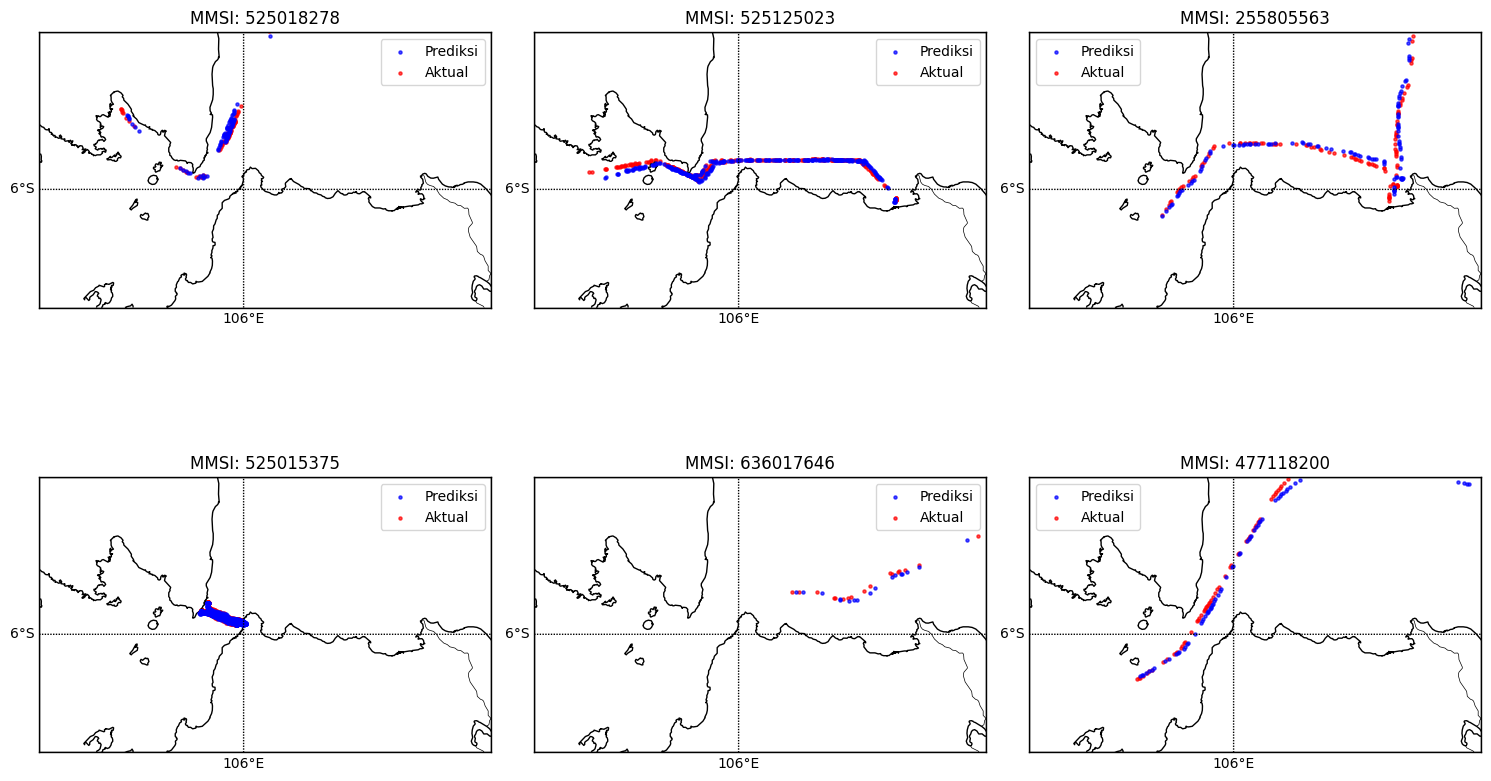

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random

# Pilih 6 MMSI secara acak
unique_mmsi = data_frame['msg_mmsi'].unique()
selected_mmsi = random.sample(list(unique_mmsi), 6)

# Mengambil batas minimum dan maksimum latitude dan longitude dari seluruh data kapal
lat_min = data_frame['Latitude Prediksi'].min()
lat_max = data_frame['Latitude Prediksi'].max()
lon_min = data_frame['Longitude Prediksi'].min()
lon_max = data_frame['Longitude Prediksi'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))

# Menampilkan keenam grafik kapal dalam satu kotak
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

for i, mmsi in enumerate(selected_mmsi, 1):
    # Membuat latar belakang peta Selat Sunda yang sesuai dengan keseluruhan data kapal
    m = Basemap(
        projection='merc',
        llcrnrlat=lat_min,
        urcrnrlat=lat_max,
        llcrnrlon=lon_min,
        urcrnrlon=lon_max,
        resolution='h',
        ax=axes[(i-1) // 3, (i-1) % 3]
    )
    m.drawcoastlines()

    # Plot titik-titik awal kapal pada peta
    selected_ship_data = data_frame[data_frame['msg_mmsi'] == mmsi]
    m.scatter(
        selected_ship_data['Longitude Prediksi'], 
        selected_ship_data['Latitude Prediksi'], 
        latlon=True, 
        s=5, 
        c='blue',  # Ganti warna prediksi menjadi biru
        marker='o', 
        alpha=0.7, 
        label='Prediksi',
        zorder=2  # Letakkan di atas titik aktual
    )
    m.scatter(
        selected_ship_data['data_lon'], 
        selected_ship_data['data_lat'], 
        latlon=True, 
        s=5, 
        c='red',  # Ganti warna aktual menjadi merah
        marker='o', 
        alpha=0.7, 
        label='Aktual',
        zorder=1  # Letakkan di bawah titik prediksi
    )

    # Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
    m.drawmapboundary(fill_color='white')
    m.drawrivers()
    m.drawparallels(range(int(lat_min), int(lat_max) + 2, 2), labels=[1, 0, 0, 0])
    m.drawmeridians(range(int(lon_min), int(lon_max) + 2, 2), labels=[0, 0, 0, 1])

    # Menambahkan legenda
    axes[(i-1) // 3, (i-1) % 3].legend(loc='best')
    axes[(i-1) // 3, (i-1) % 3].set_title(f'MMSI: {mmsi}')

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "kapal_prediksi_vs_aktual.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')
    
# Menampilkan semua subplot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

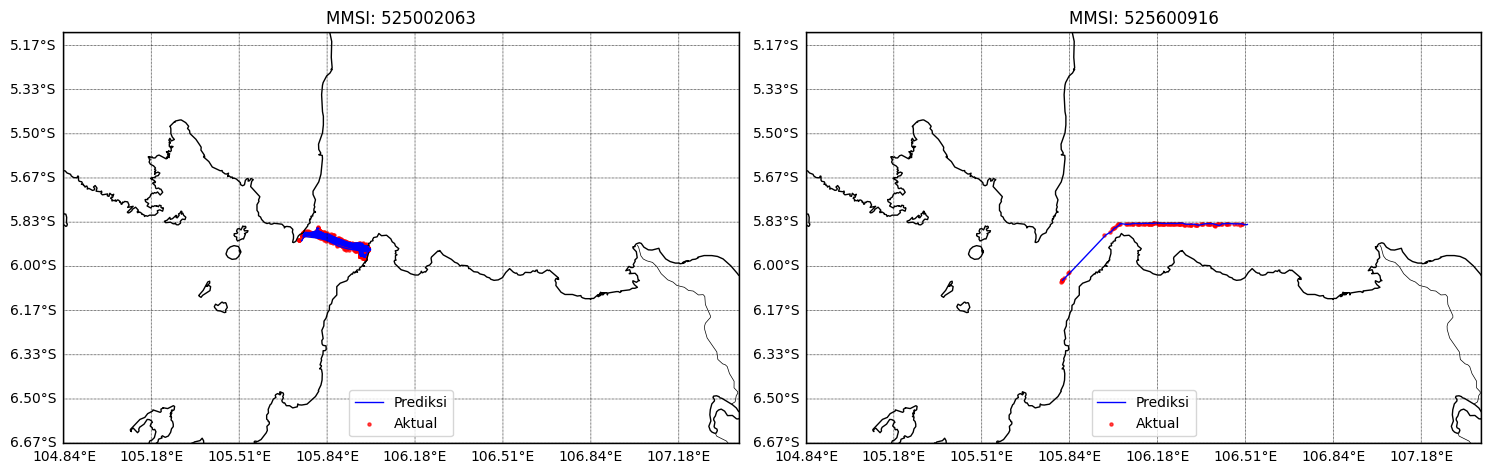

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random

# Pilih 2 MMSI secara acak
unique_mmsi = data_frame['msg_mmsi'].unique()
selected_mmsi = random.sample(list(unique_mmsi), 2)  # Mengambil 2 MMSI secara acak

# Mengambil batas minimum dan maksimum latitude dan longitude dari seluruh data kapal
lat_min = data_frame['Latitude Prediksi'].min()
lat_max = data_frame['Latitude Prediksi'].max()
lon_min = data_frame['Longitude Prediksi'].min()
lon_max = data_frame['Longitude Prediksi'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))

# Menampilkan dua grafik kapal dalam satu kotak
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Menggunakan 1 baris dan 2 kolom

for i, mmsi in enumerate(selected_mmsi, 1):
    # Membuat latar belakang peta Selat Sunda yang sesuai dengan keseluruhan data kapal
    m = Basemap(
        projection='merc',
        llcrnrlat=lat_min,
        urcrnrlat=lat_max,
        llcrnrlon=lon_min,
        urcrnrlon=lon_max,
        resolution='h',
        ax=axes[i - 1]  # Menggunakan subplot sesuai dengan iterasi
    )
    m.drawcoastlines()

    # Plot garis prediksi pada peta
    selected_ship_data = data_frame[data_frame['msg_mmsi'] == mmsi]
    m.plot(
        selected_ship_data['Longitude Prediksi'],
        selected_ship_data['Latitude Prediksi'],
        latlon=True,
        linestyle='-',
        linewidth=1,
        color='blue',  # Ganti warna prediksi menjadi biru
        label='Prediksi',
    )
    m.scatter(
        selected_ship_data['data_lon'],
        selected_ship_data['data_lat'],
        latlon=True,
        s=5,
        c='red',  # Ganti warna aktual menjadi merah
        marker='o',
        alpha=0.7,
        label='Aktual',
        zorder=1  # Letakkan di bawah garis prediksi
    )

    # Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
    m.drawmapboundary(fill_color='white')
    m.drawrivers()
    # Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
    parallels = np.arange(lat_min, lat_max, 1/6)
    # Menambahkan grid dengan interval 1/3° pada garis vertikal
    meridians = np.arange(lon_min, lon_max, 1/3)

    m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, linewidth=0.5, fmt='%1.2f')
    m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, linewidth=0.5, fmt='%1.2f')

    # Menambahkan legenda
    axes[i - 1].legend(loc='best')
    axes[i - 1].set_title(f'MMSI: {mmsi}')

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "2kapal_prediksi_vs_aktual.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan semua subplot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

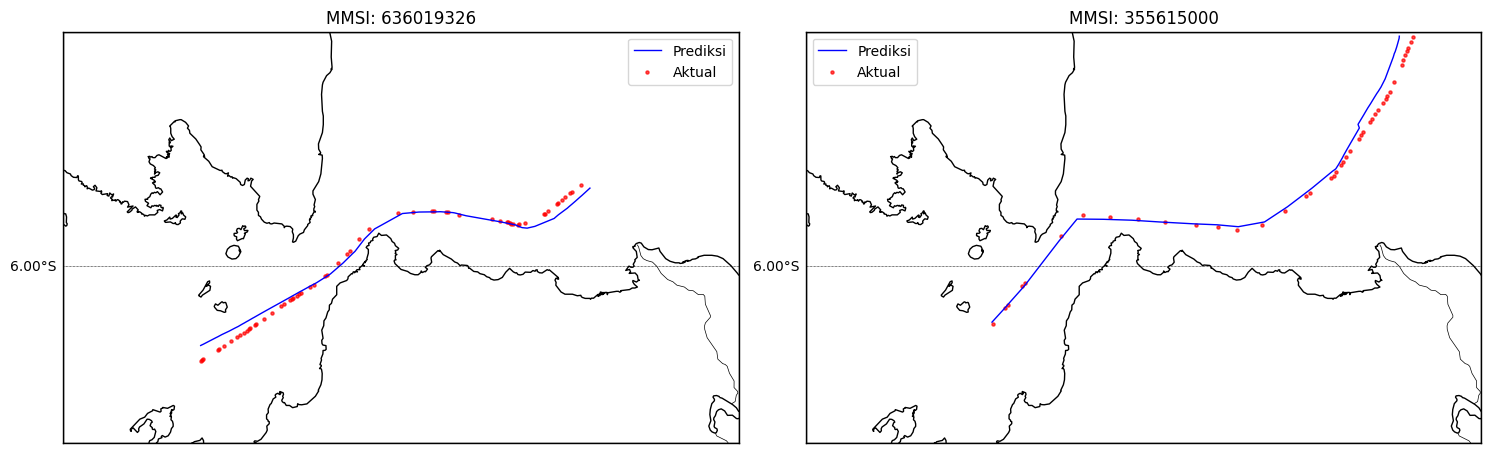

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random

# Pilih 2 MMSI secara acak
unique_mmsi = data_frame['msg_mmsi'].unique()
selected_mmsi = random.sample(list(unique_mmsi), 2)  # Mengambil 2 MMSI secara acak

# Mengambil batas minimum dan maksimum latitude dan longitude dari seluruh data kapal
lat_min = data_frame['Latitude Prediksi'].min()
lat_max = data_frame['Latitude Prediksi'].max()
lon_min = data_frame['Longitude Prediksi'].min()
lon_max = data_frame['Longitude Prediksi'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))

# Menampilkan dua grafik kapal dalam satu kotak
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Menggunakan 1 baris dan 2 kolom

for i, mmsi in enumerate(selected_mmsi, 1):
    # Membuat latar belakang peta Selat Sunda yang sesuai dengan keseluruhan data kapal
    m = Basemap(
        projection='merc',
        llcrnrlat=lat_min,
        urcrnrlat=lat_max,
        llcrnrlon=lon_min,
        urcrnrlon=lon_max,
        resolution='h',
        ax=axes[i - 1]  # Menggunakan subplot sesuai dengan iterasi
    )
    m.drawcoastlines()

    # Plot garis prediksi pada peta dengan menghubungkan titik secara berurutan
    selected_ship_data = data_frame[data_frame['msg_mmsi'] == mmsi]
    lon_prediksi = selected_ship_data['Longitude Prediksi'].tolist()
    lat_prediksi = selected_ship_data['Latitude Prediksi'].tolist()
    m.plot(lon_prediksi, lat_prediksi, latlon=True, linestyle='-', linewidth=1, color='blue', label='Prediksi')

    m.scatter(
        selected_ship_data['data_lon'],
        selected_ship_data['data_lat'],
        latlon=True,
        s=5,
        c='red',  # Ganti warna aktual menjadi merah
        marker='o',
        alpha=0.7,
        label='Aktual',
        zorder=1  # Letakkan di bawah garis prediksi
    )

    # Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
    m.drawmapboundary(fill_color='white')
    m.drawrivers()
    # Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
    parallels = range(int(lat_min), int(lat_max) + 1, 10)
    # Menambahkan grid dengan interval 1/3° pada garis vertikal
    meridians = range(int(lon_min), int(lon_max) + 1, 20)

    m.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0.5, fmt='%1.2f')
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0.5, fmt='%1.2f')

    # Menambahkan legenda
    axes[i - 1].legend(loc='best')
    axes[i - 1].set_title(f'MMSI: {mmsi}')

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "2kapal_prediksi_vs_aktual.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan semua subplot
plt.tight_layout()
plt.show()
